# <center>Exploratory Data Analysis (EDA) </center>
References:
* https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
* Check good EDA notebooks published at Kaggle, e.g.
   * https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
* Visualization:
   * https://towardsdatascience.com/pyviz-simplifying-the-data-visualisation-process-in-python-1b6d2cb728f1
   * https://medium.com/search?q=python%20visualization

##  1. What is Exploratory Data Analysis (EDA)

- EDA is an approach to analyzing data sets to 
  * prepare data for modeling, e.g. 
    - dealing with missing values
    - feature engineering
    - correlation analysis etc
  * summarize their main characteristics, often with visual methods (i.e. **data profiling**)
  * generate hypotheses for subsequent modeling stage 

## 2. Example
- Data set: UCI Auto MPG datset (https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
- Target:
  * Analyze variable correlation
  * Data profiling (visualization)

In [9]:
# Exercise 2.1. Load the data and library

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

In [31]:
df = pd.read_csv('./auto-mpg.csv', header=0)
df.head()
df.info()  # get detailed information of each column

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car           406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


## 3. Deal with Missing Values
- Find variables with missing values
- How to deal variables with missing values
  - drop samples (rows)
  - drop variables (columns)
  - interpolate

In [32]:
# Exercise 3.1. Create a simply If dataframe
# Missing values are shown as NaN (not a number)

import numpy as np

df1 = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, 6, 1],
                   [np.nan, np.nan, np.nan, 5], [5, 8, 2, 5]],
                   columns=list('ABCD'))
df1

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


In [33]:
# Exercise 3.2. Find missing values

# determine which value is null
df1.isnull()

# get number of null values in each row
df1.isnull().sum(axis=1)

,A,B,C,D
0,True,False,True,False
1,False,False,False,False
2,True,True,True,False
3,False,False,False,False


0    2
1    0
2    3
3    0
dtype: int64

In [34]:
#determine which row/columns have null values
df1.isnull().any(axis=0)
df1.isnull().any(axis=1)

# return any row which has at least one null value
df1[df1.isnull().any(axis=1)]

A     True
B     True
C     True
D    False
dtype: bool

0     True
1    False
2     True
3    False
dtype: bool

,A,B,C,D
0,NaN,2.0,NaN,0
2,NaN,NaN,NaN,5


In [35]:
# Exercise 3.3. drop missing values
df1
# to drop row/column which contains any NaN, use how='any'
df1.dropna(axis=1, how='any')  

df1.dropna(axis=0, how='all')  

# drop the columns which have 
# less than 3 good values (not missing)

df1.dropna(axis=0, thresh=3)

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,D
0,0
1,1
2,5
3,5


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,A,B,C,D
1,3.0,4.0,6.0,1
3,5.0,8.0,2.0,5


In [36]:
df1.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,6.0,1
2,0.0,0.0,0.0,5
3,5.0,8.0,2.0,5


In [37]:
# Exercise 3.4. interpolate missing values
df1
df1.interpolate(method='linear')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,NaN,NaN,NaN,5
3,5.0,8.0,2.0,5


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,6.0,1
2,4.0,6.0,4.0,5
3,5.0,8.0,2.0,5


In [38]:
#  now get back to our auto-mpg dataset

df.isnull().sum(axis=0)

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car             0
dtype: int64

In [39]:
# Exercise 3.5. # drop samples that have missing values

df=df.dropna(axis=0, how='any')  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car           392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 4. Visualization

- Typical graphical techniques used in EDA:
  - Bar chart
  - Histogram
  - Line chart
  - Scatter plot
  - Heatmap
  - ...
  
- Plot libraries
  - Matplotlib: a Python 2D plotting library which produces publication quality figures  
  - Seaborn:  a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
  - Pandas plot: very convenient library based on matplotlib
  - Plotly: interactive plots https://plotly.com/chart-studio-help/tutorials/

In [40]:
# Exercise 4.1. Import plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt

# plot charts inline
%matplotlib inline


### 4.1 Barchart
- Different forms: single bar, stacked, verticle, horizontal 
- Barcharts can be conveniently created using pandas
  * by default, **x axis is the index, and y can be columns**
  * value_counts, groupby, agg, pivot_table, or crosstab can be used to create values for plotting

In [41]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

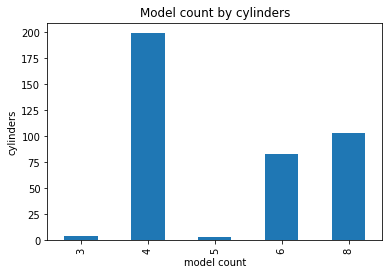

In [42]:
# Exercise 4.1.1 Plot number of cars by cylinders

ax=df.cylinders.value_counts().sort_index(axis=0).\
   plot.bar(figsize=(6,4), title="Model count by cylinders");

# set labels
ax.set(ylabel="cylinders", xlabel="model count");

# note: ";" to suppress unwanted output

In [43]:
# Exercise 4.1.2: create a bar chart to
# count models per origin


In [44]:
# Exercise 4.1.2. Use seaborn to generate attractive plot

# count cars by year
count_by_year=df.model_year.value_counts().reset_index()
count_by_year.columns=["year", "model_count"]
count_by_year

,year,model_count
0,73,40
1,78,36
2,76,34
3,75,30
4,82,30
5,70,29
6,79,29
7,72,28
8,77,28
9,81,28


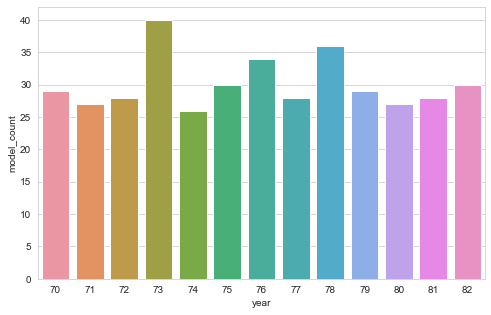

In [45]:
# set style
sns.set_style("whitegrid");

plt.figure(figsize=(8,5));

# Note x and y parameters should be set properly
# However, plot from pandas set x and y automatically

sns.barplot(x='year',y='model_count', data=count_by_year);
plt.show();   


In [ ]:
# plotly
import plotly.express as px

#long_df = px.data.medals_long()

fig = px.bar(count_by_year, x='year',y='model_count',\
              title="model by year")
fig.show()


### 4.2. Line chart

In [58]:
df.groupby('model_year')[["mpg","acceleration"]].mean()

,mpg,acceleration
model_year,,
70,17.689655,12.948276
71,21.111111,15.000000
72,18.714286,15.125000
73,17.100000,14.312500
74,22.769231,16.173077
75,20.266667,16.050000
76,21.573529,15.941176
77,23.375000,15.435714
78,24.061111,15.805556


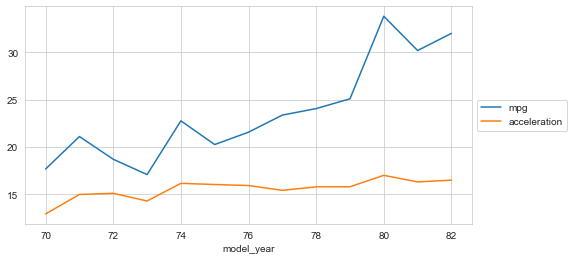

In [59]:
# Exercise 4.2.1. line chart

# How does mpg/acceleration change over time?

# show the relationship between 
# average mpg/cceleration and model year
# also note that two lines can be plotted with explicitly setting x and y

df.groupby('model_year')[["mpg","acceleration"]].mean()\
.plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

# what finding can be seen here?

### 4.3 Histogram : learn distribution of varilables

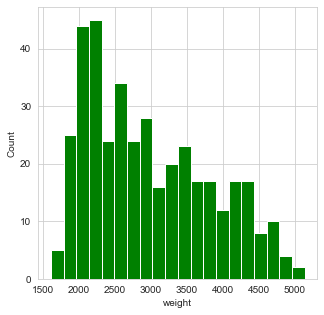

In [60]:
# Exercise 4.3.1. Histogram

# plot histgram using matlibplot
plt.figure(figsize=(5, 5));
plt.hist(df['weight'], color='g', bins=20);
plt.xlabel("weight");
plt.ylabel("Count");

<Figure size 360x360 with 0 Axes>

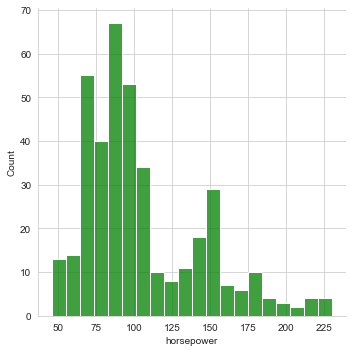

In [61]:
# Exercise 4.3.2. plot histogram and PDF using seaborn

sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.displot(df["horsepower"], color='g', bins=20);

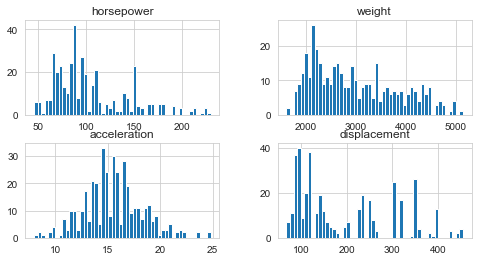

In [62]:
# Exercise 4.3.3. plot multiple histogram plots using pandas plot

df[['horsepower', 'weight','acceleration','displacement']]\
.hist(figsize=(8, 4), bins=50);

### 4.4. Scatterplot: show interaction between variables
- Pairwise scatter plot: discover interaction between any pair of variables
- Check variable correlation using pd.corr()

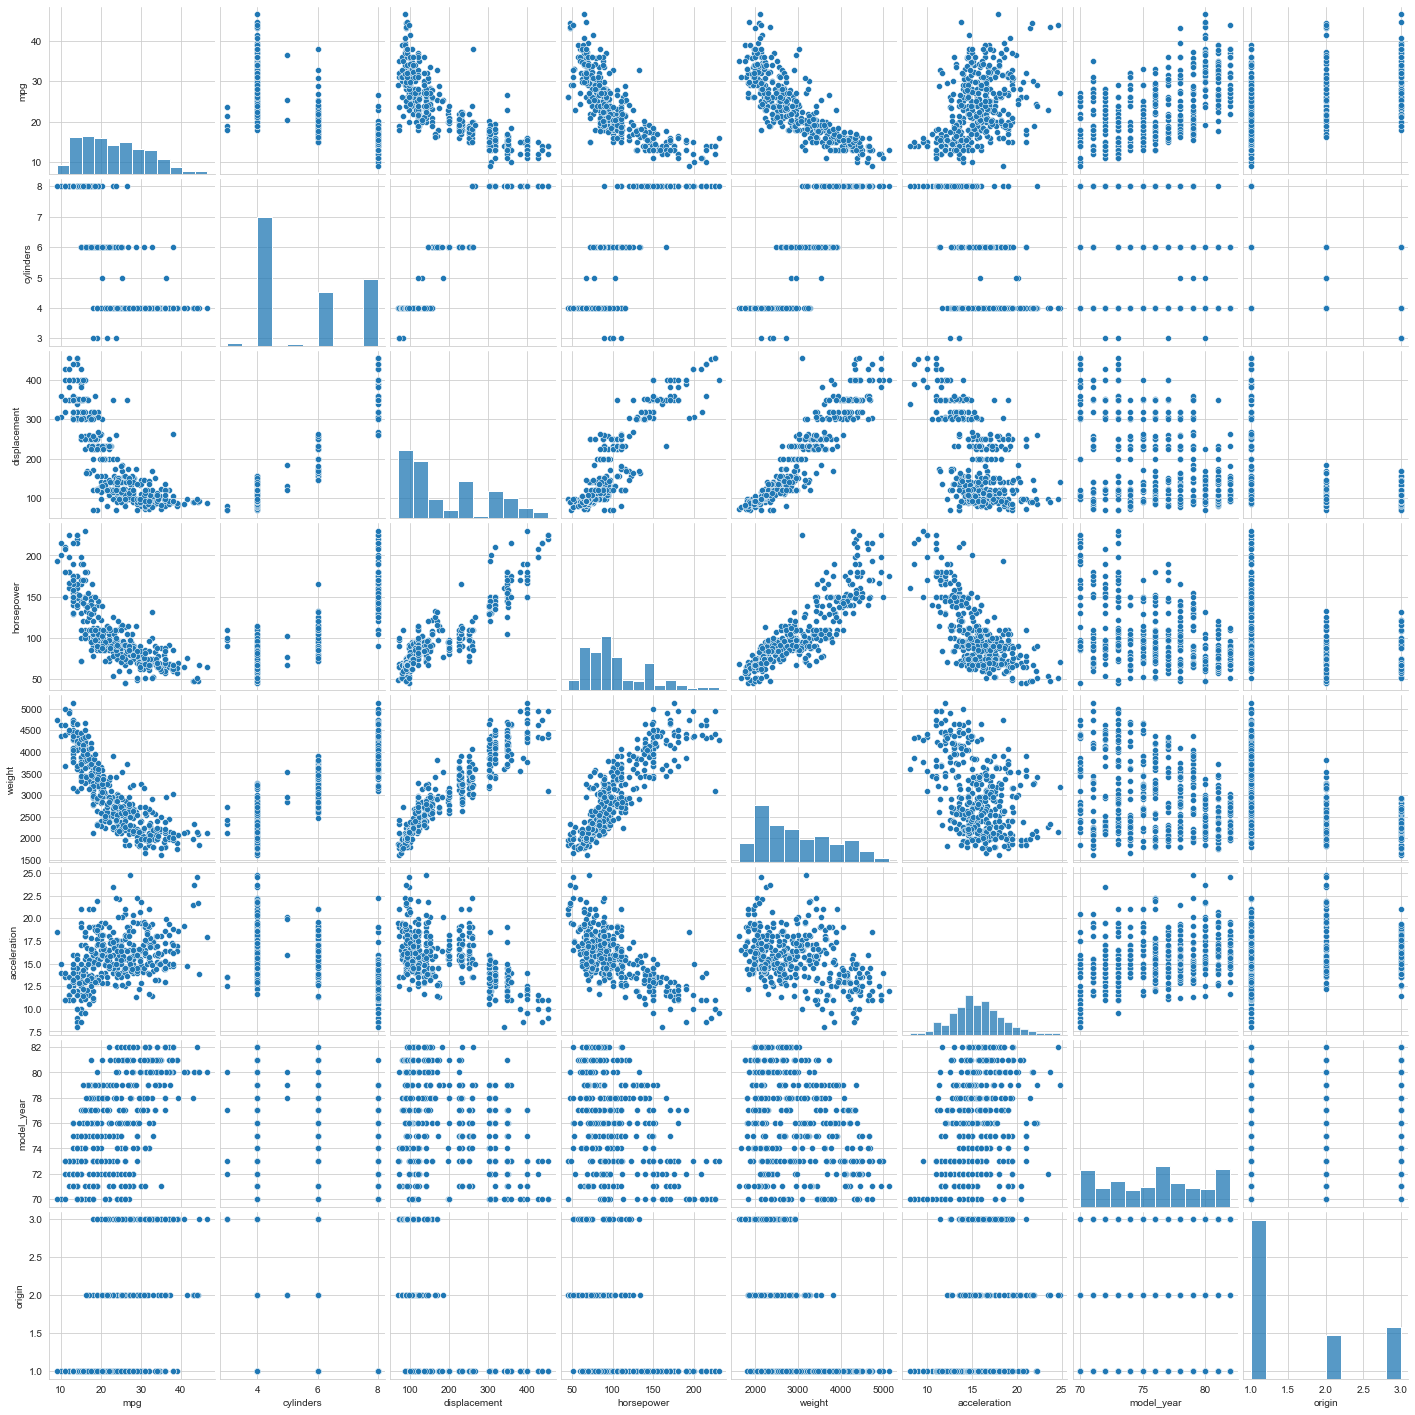

In [63]:
# Exercise 4.4.1. Pairwise scatterplot

sns.pairplot(data=df);

# mpg, weight, displacement, ... 
# seem to be highly correlated

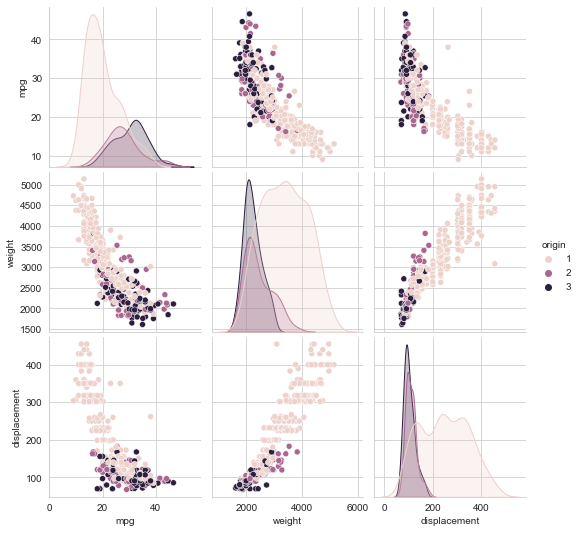

In [64]:
# Exercise 4.4.2. pairwise scatterplot with selected columns

# select variables for x and y axis
# color the points by origin (hue)

sns.pairplot(data=df, x_vars=['mpg', 'weight', 'displacement'],\
             y_vars=['mpg', 'weight', 'displacement'], \
             hue="origin");

# anything interesting can be found here?
# how about mpg/weight/displacement by origin?


In [65]:
# Exercise 4.4.3. Variable correlation

# Keep 3 decimals when printing float numberss
pd.options.display.float_format = '{:,.2f}'.format

df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


### 4.5. FacetGrid: Show variable relationship by facet

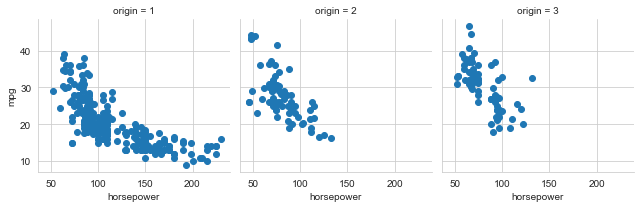

In [66]:
# Exercise 4.6.1.: How is horsepower and mpg correlated
#                 for cars from different origin? 

# Generate grid by origin
g = sns.FacetGrid(df, col="origin") ;
g
# plot a scatterplot between hrsepower and mpg 
# for each facet in the grid
g.map(plt.scatter, "horsepower", "mpg") ;

# what insights can be found from this facet plot?


## 5. Regression
- For details, see http://www.statsmodels.org/dev/example_formulas.html
- For categorical variables, you can use R style formulas
- Model interpretation: http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [77]:
# Exercise 5.1.  OLS(ordinary least squares) regression 

# linear regression between mpg and other factors


import statsmodels.api as sm


X = df[['cylinders', 'displacement','horsepower',\
        'weight','acceleration']]

# add Intercept
X = sm.add_constant(X)
Y = df.mpg

model = sm.OLS(Y,X).fit()


# Print out the statistics
model.summary()


C:\Program Files\Python3.9.7\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          9.82e-101
Time:                        13:17:27   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Exercise 5.2.
# Use C to get dummy variables

import statsmodels.formula.api as smf


model = smf.ols(formula = 'mpg ~ cylinders + displacement+horsepower+ weight \
                          + acceleration+ C(origin)', \
                   data = df).fit();

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     141.7
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          2.78e-102
Time:                        13:17:03   Log-Likelihood:                -1111.1
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     384   BIC:                             2270.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.7688      2.640     16.959      0.000      39.578      49.959
C(origin)[T.2]     1.1255      0.702      1.604      0.109      -0.254       2.505
C(origin)[T.3]     2.9325      0.696      4.216      0.000       1.565       4.300
cylinders         -0.5662      0.404     -1.401      0.162      -1.361       0.229
displacement       0.0114      0.010      1.194      0.233      -0.007       0.030
horsepower        -0.0613      0.017     -3.636      0.000      -0.094      -0.028
weight            -0.0048      0.001     -5.948      0.000      -0.006      -0.003
acceleration      -0.0320      0.123     -0.259      0.795      -0.274       0.210
==============================================================================
Omnibus:                       34.295   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.569
Skew:                           0.635   Prob(JB):                     4.68e-11
Kurtosis:                       4.140   Cond. No.                     3.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""